In [9]:
import numpy as np
import matplotlib.pyplot as plt
import os

In [52]:
def plotRegistrationErrors(mean_errors, min_errors, max_errors, 
                           metric_values, multires_iters):
    # Plot the TRE mean value and the [min-max] range.
    figTre, axTre = plt.subplots(1, 1)
    axTre.plot(mean_errors, color="black", label="Průměrná vzdálenost")
    axTre.fill_between(range(len(mean_errors)), min_errors, max_errors,
                     facecolor="red", alpha=0.5, label="Rozpětí vzdáleností")
    axTre.plot(multires_iters, mean_errors[multires_iters], marker="o", 
                  label="Registrační úroveň", linestyle="none", 
                  markeredgecolor="none", markersize=6., c="b")
    axTre.set_xlabel("Iterace [-]", fontsize=13)
    axTre.set_ylabel("Vzdálenost [mm]", fontsize=13)
    axTre.set_title("Míra nepřesnosti registrace", fontsize=15)
    axTre.set_xticks(np.arange(0, len(metric_values) + 1, 10))
    axTre.grid(alpha=0.5)
    axTre.legend()
    plt.show()
    
def plotMetricValues(metric_values, multires_iters):
    figMetric, axMetric = plt.subplots()
    axMetric.plot(range(0, len(metric_values)), metric_values, label="Vzájemná informace")
    axMetric.plot(multires_iters, metric_values[multires_iters], marker="o", 
                  label="Registrační úroveň", linestyle="none", 
                  markeredgecolor="none", markersize=6.)
    axMetric.set_xlabel("Iterace [-]", fontsize=13)
    axMetric.set_ylabel("Vzájemná informace [-]", fontsize=13)
    axMetric.set_title("Minimalizace podobnostní metriky", fontsize=15)
    axMetric.set_xticks(np.arange(0, len(metric_values) + 1, 10))
    axMetric.grid(alpha=0.5)
    axMetric.legend()
    plt.show()
    
def plotErrorHistogram(errors):
    fig, axHist = plt.subplots(1, 1)
    axHist.hist(errors[0, :], bins=12, alpha=0.5, label="Před registrací", color="blue")
    axHist.hist(errors[-1, :], bins=12, alpha=0.5, label="Po registraci", color="green")
    axHist.set_xlabel("Vzdálenost [mm]", fontsize=13)
    axHist.set_ylabel("", fontsize=13)
    axHist.set_title("Rozložení míry nepřenosti registrace", fontsize=15)
    axHist.grid(alpha=0.5)
    axHist.legend()
    plt.show()

In [11]:
patientNumber = "09"
regMethodDir = "gradient"
view = "ap"
regDir = os.path.join(os.getcwd(), f"input_files\\pacient_{patientNumber}\\registration\\{regMethodDir}\\")

regInfoFile = np.load(os.path.join(regDir, f"pacient{patientNumber}registrationInfo{view.upper()}.npz"))
errorsInfoFile = np.load(os.path.join(regDir, f"pacient{patientNumber}ErrorsInfo{view.upper()}.npz"))

In [12]:
regInfo = {key: regInfoFile[key] for key in regInfoFile.files}
errorsInfo = {key: errorsInfoFile[key] for key in errorsInfoFile.files} 

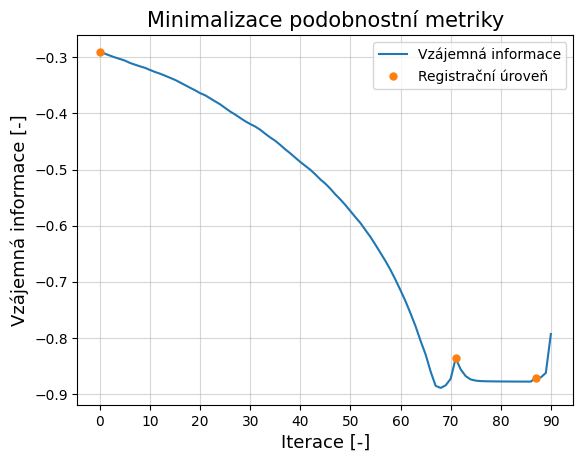

In [43]:
plotMetricValues(regInfo["metricValues"], regInfo["multiresIters"])

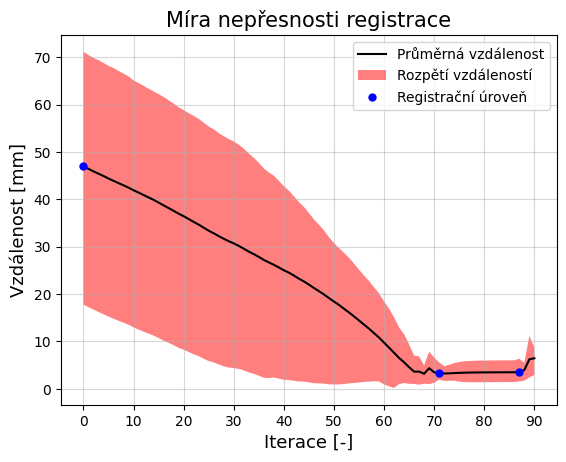

In [51]:
plotRegistrationErrors(errorsInfo["meanValues"], errorsInfo["minValues"], 
                       errorsInfo["maxValues"], regInfo["metricValues"], 
                       regInfo["multiresIters"])

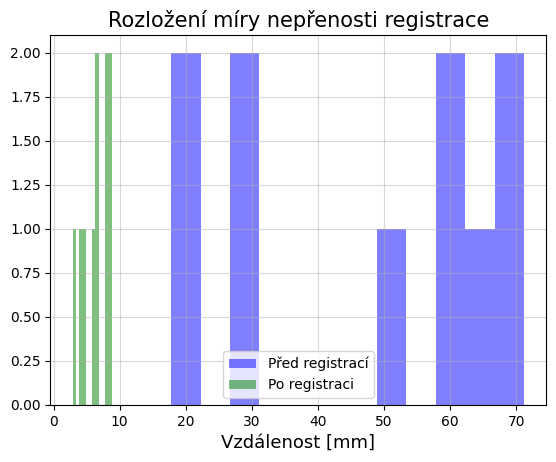

In [53]:
plotErrorHistogram(errorsInfo["errorValues"])